In [1]:
import sqlite3
import pandas as pd
import os

# --- Configuration ---
# The path to your database file relative to your current location (likely the project root or notebook directory)
# Adjust this path if your notebook is not in the project root.
DATABASE_PATH = '../db/ipl_stats.db' 

# If your notebook is in the 'notebooks' folder, you might need:
# DATABASE_PATH = '../db/ipl_stats.db' 

print(f"Attempting to connect to database at: {DATABASE_PATH}")

try:
    # 1. Connect to the SQLite database
    conn = sqlite3.connect(DATABASE_PATH)
    print("Database connection successful!")

    # 2. Test the connection by retrieving the list of all tables
    # This standard SQLite query retrieves all user-defined tables
    query_tables = "SELECT name FROM sqlite_master WHERE type='table';"
    
    # Use pandas to read the SQL query result directly into a DataFrame
    tables_df = pd.read_sql_query(query_tables, conn)
    
    print("\n--- Tables in the Database ---")
    print(tables_df)

except sqlite3.Error as e:
    print(f"\nERROR: Could not connect to the database or run the query.")
    print(f"SQLite Error: {e}")
    print("\nPlease check if the 'ipl_stats.db' file exists in the 'db' folder and the path is correct.")

finally:
    # 3. Always close the connection when done
    if 'conn' in locals() and conn:
        conn.close()
        print("\nConnection closed.")

Attempting to connect to database at: ../db/ipl_stats.db
Database connection successful!

--- Tables in the Database ---
                     name
0        batting_averages
1    batting_strike_rates
2         bowling_economy
3        ipl_ball_by_ball
4   bowlers_total_wickets
5             ipl_matches
6        team_performance
7            most_catches
8      most_dismissals_wk
9               most_runs
10           most_wickets
11         player_details
12         season_winners
13         unique_players
14     venue_intelligence

Connection closed.


In [2]:
import sqlite3
import pandas as pd

DATABASE_PATH = '../db/ipl_stats.db' # Assuming your notebook is in the 'notebooks' folder
conn = sqlite3.connect(DATABASE_PATH)
print("Connection ready for analysis.")

Connection ready for analysis.


In [3]:
query_top_scorers = """
SELECT
    player_name,
    runs
FROM
    most_runs
ORDER BY
    runs DESC
LIMIT 10;
"""

top_scorers_df = pd.read_sql_query(query_top_scorers, conn)
print("\n--- A. Top 10 All-Time IPL Run Scorers ---")
print(top_scorers_df)


--- A. Top 10 All-Time IPL Run Scorers ---
                           player_name  runs
0                        V Kohli (RCB)  8661
1                   RG Sharma (DCH/MI)  7046
2        S Dhawan (DC/DCH/MI/PBKS/SRH)  6769
3                   DA Warner (DC/SRH)  6565
4                    SK Raina (CSK/GL)  5528
5                   MS Dhoni (CSK/RPS)  5439
6  KL Rahul (DC/KXIP/LSG/PBKS/RCB/SRH)  5222
7              AB de Villiers (DC/RCB)  5162
8     AM Rahane (CSK/DC/KKR/MI/RPS/RR)  5032
9         CH Gayle (KKR/KXIP/PBKS/RCB)  4965


In [4]:
query_team_win_rate = """
SELECT
    teams,
    matches,
    won,
    -- Calculate Win Percentage (Won / Matches Played)
    ROUND(CAST(won AS REAL) * 100 / matches, 2) AS win_percent
FROM
    team_performance
WHERE
    matches > 0 -- Exclude teams with zero matches played
ORDER BY
    win_percent DESC
LIMIT 5;
"""

team_stats_df = pd.read_sql_query(query_team_win_rate, conn)
print("\n--- B. Top 5 Teams by Overall Win Percentage ---")
print(team_stats_df)


--- B. Top 5 Teams by Overall Win Percentage ---
                   teams  matches  won  win_percent
0         Gujarat Titans       60   37        61.67
1    Chennai Super Kings      253  142        56.13
2         Mumbai Indians      277  151        54.51
3   Lucknow Super Giants       58   30        51.72
4  Kolkata Knight Riders      265  135        50.94


In [5]:
query_toss_bias = """
SELECT
    toss_decision,
    COUNT(*) AS total_matches,
    SUM(CASE WHEN toss_winner = winner THEN 1 ELSE 0 END) AS wins_by_toss_winner,
    ROUND(SUM(CASE WHEN toss_winner = winner THEN 1 ELSE 0 END) * 100.0 / COUNT(*), 2) AS win_percent_if_toss_winner
FROM
    ipl_matches
GROUP BY
    toss_decision;
"""

toss_bias_df = pd.read_sql_query(query_toss_bias, conn)
print("\n--- C. Match Trends: Win Rate Based on Toss Decision ---")
print(toss_bias_df)


--- C. Match Trends: Win Rate Based on Toss Decision ---
  toss_decision  total_matches  wins_by_toss_winner  \
0           bat            405                  183   
1         field            764                  408   

   win_percent_if_toss_winner  
0                       45.19  
1                       53.40  


In [6]:
if conn:
    query_venue_score = """
    SELECT
        venue,
        matches_played,
        avg_1st_innings_score
    FROM
        venue_intelligence
    ORDER BY
        avg_1st_innings_score DESC
    LIMIT 5;
    """

    venue_score_df = pd.read_sql_query(query_venue_score, conn)
    print("\n--- D. Top 5 Venues by Average 1st Innings Score (High Scoring) ---")
    print(venue_score_df)
else:
    print("Skipping query D: Database connection failed.")


--- D. Top 5 Venues by Average 1st Innings Score (High Scoring) ---
                                               venue  matches_played  \
0  Himachal Pradesh Cricket Association Stadium, ...              15   
1                   Narendra Modi Stadium, Ahmedabad              45   
2                          Brabourne Stadium, Mumbai              27   
3  Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...              22   
4                Barsapara Cricket Stadium, Guwahati               5   

   avg_1st_innings_score  
0                 183.13  
1                 180.51  
2                 178.52  
3                 175.36  
4                 174.60  


In [7]:
if conn:
    # Assuming 'overs' is in bowling_econ table as per your schema
    query_top_econ = """
    SELECT
        player_names,
        overs,
        econ
    FROM
        bowling_economy
    WHERE
        overs >= 100 -- Set a minimum qualification threshold for economy
    ORDER BY
        econ ASC
    LIMIT 10;
    """

    top_econ_df = pd.read_sql_query(query_top_econ, conn)
    print("\n--- E. Top 10 Most Economical Bowlers (Min 100 Overs) ---")
    print(top_econ_df)
else:
    print("Skipping query E: Database connection failed.")


--- E. Top 10 Most Economical Bowlers (Min 100 Overs) ---
                    player_names  overs  econ
0                 A Kumble (RCB)  160.5  6.57
1  M Muralidaran (CSK/Kochi/RCB)  254.0  6.67
2            DL Vettori (DC/RCB)  129.3  6.78
3                SP Narine (KKR)  724.1  6.79
4      DW Steyn (DCH/GL/RCB/SRH)  362.4  6.91
5            J Botha (DC/KKR/RR)  115.4  6.91
6          R Sharma (DC/DCH/PWI)  154.4  7.02
7   Harbhajan Singh (CSK/KKR/MI)  569.2  7.07
8           Rashid Khan (GT/SRH)  531.3  7.08
9                SL Malinga (MI)  471.1  7.14


In [8]:
if conn:
    # Assuming 'runs' and 'sr' (strike rate) are in batting_sr table as per your schema
    query_top_sr = """
    SELECT
        player_names,
        runs,
        sr
    FROM
        batting_strike_rates
    WHERE
        runs >= 1000 -- Set a minimum qualification threshold for runs
    ORDER BY
        sr DESC
    LIMIT 10;
    """

    top_sr_df = pd.read_sql_query(query_top_sr, conn)
    print("\n--- F. Top 10 Batsmen by Strike Rate (Min 1000 Runs) ---")
    print(top_sr_df)
else:
    print("Skipping query F: Database connection failed.")


--- F. Top 10 Batsmen by Strike Rate (Min 1000 Runs) ---
                       player_names  runs      sr
0              PD Salt (DC/KKR/RCB)  1056  175.70
1               AD Russell (DC/KKR)  2651  174.17
2                 TM Head (RCB/SRH)  1146  170.02
3            H Klaasen (RCB/RR/SRH)  1480  169.72
4      N Pooran (KXIP/LSG/PBKS/SRH)  2293  168.97
5                   SP Narine (KKR)  1780  166.51
6          Abhishek Sharma (DC/SRH)  1816  163.01
7      LS Livingstone (PBKS/RCB/RR)  1051  158.76
8                V Sehwag (DC/KXIP)  2728  155.44
9  GJ Maxwell (DC/KXIP/MI/PBKS/RCB)  2819  155.14


In [9]:
query_top_wicket_takers = """
SELECT
    player_name,
    wickets
FROM
    most_wickets
ORDER BY
    wickets DESC
LIMIT 10;
"""

top_wicket_takers_df = pd.read_sql_query(query_top_wicket_takers, conn)
print("\n--- G. Top 10 All-Time IPL Wicket Takers ---")
print(top_wicket_takers_df)


--- G. Top 10 All-Time IPL Wicket Takers ---
                     player_name  wickets
0     YS Chahal (MI/PBKS/RCB/RR)      221
1          B Kumar (PWI/RCB/SRH)      198
2                SP Narine (KKR)      192
3    PP Chawla (CSK/KKR/KXIP/MI)      192
4  R Ashwin (CSK/DC/KXIP/RPS/RR)      187
5                 JJ Bumrah (MI)      183
6           DJ Bravo (CSK/GL/MI)      183
7      A Mishra (DC/DCH/LSG/SRH)      174
8                SL Malinga (MI)      170
9    RA Jadeja (CSK/GL/Kochi/RR)      170


In [11]:
if conn:
    query_top_bowler_sr = """
    SELECT
        player_name,
        wickets,
        overs,
        -- Calculate Bowling Strike Rate (SR = Balls / Wickets)
        ROUND((overs * 6.0) / wickets, 2) AS bowling_strike_rate
    FROM
        most_wickets
    WHERE
        overs >= 100 AND wickets > 0
    ORDER BY
        bowling_strike_rate ASC
    LIMIT 10;
    """

    top_bowler_sr_df = pd.read_sql_query(query_top_bowler_sr, conn)
    print("\n--- H. Top 10 Bowlers by Strike Rate (Wicket Takers, Min 100 Overs) ---")
    print(top_bowler_sr_df)
else:
    print("Skipping query : Database connection failed.")


--- H. Top 10 Bowlers by Strike Rate (Wicket Takers, Min 100 Overs) ---
                  player_name  wickets  overs  bowling_strike_rate
0         AD Russell (DC/KKR)      123  301.0                14.68
1           M Pathirana (CSK)       47  117.0                14.94
2      JR Hazlewood (CSK/RCB)       57  144.3                15.19
3       K Rabada (DC/GT/PBKS)      119  317.0                15.98
4    Imran Tahir (CSK/DC/RPS)       82  219.2                16.04
5  HV Patel (DC/PBKS/RCB/SRH)      151  404.0                16.05
6       MA Starc (DC/KKR/RCB)       65  174.3                16.09
7          Harshit Rana (KKR)       40  108.1                16.21
8     AJ Tye (GL/KXIP/LSG/RR)       42  114.0                16.29
9         Noor Ahmad (CSK/GT)       48  132.0                16.50


In [13]:
if conn:
    query_all_rounders = """
    SELECT
        T1.player_name,
        T1.runs,
        T2.wickets,
        T1.matches,
        -- Calculate an All-Rounder Impact Score (simple additive model)
        (T1.runs * 0.1 + T2.wickets * 10) AS impact_score
    FROM
        most_runs AS T1
    INNER JOIN
        most_wickets AS T2 ON T1.player_name = T2.player_name
    WHERE
        T1.runs >= 1000 AND T2.wickets >= 50 -- Filter for established all-rounders
    ORDER BY
        impact_score DESC
    LIMIT 10;
    """

    all_rounders_df = pd.read_sql_query(query_all_rounders, conn)
    print("\n--- I. Top 10 All-Rounders by Impact Score (Min 1000 Runs & 50 Wickets) ---")
    print(all_rounders_df)
else:
    print("Skipping query I: Database connection failed.")


--- I. Top 10 All-Rounders by Impact Score (Min 1000 Runs & 50 Wickets) ---
                      player_name  runs  wickets  matches  impact_score
0                 SP Narine (KKR)  1780      192      189        2098.0
1     RA Jadeja (CSK/GL/Kochi/RR)  3260      170      254        2026.0
2            DJ Bravo (CSK/GL/MI)  1560      183      161        1986.0
3             AD Russell (DC/KKR)  2651      123      140        1495.1
4              AR Patel (DC/KXIP)  1916      128      162        1471.6
5          SR Watson (CSK/RCB/RR)  3874       92      145        1307.4
6          KH Pandya (LSG/MI/RCB)  1756       93      142        1105.6
7               HH Pandya (GT/MI)  2749       78      152        1054.9
8                 KA Pollard (MI)  3412       69      189        1031.2
9  IK Pathan (DC/GL/KXIP/RPS/SRH)  1139       80      103         913.9


In [15]:
if conn:
    query_wk_rate = """
    SELECT
        player_name,
        matches,
        innings,
        dismissed,
        -- We'll use the pre-calculated 'dis/inn' field if available, or calculate it
        ROUND(CAST(dismissed AS REAL) / innings, 3) AS dismissals_per_inning
    FROM
        most_dismissals_wk
    WHERE
        innings >= 100 -- Minimum innings to qualify
    ORDER BY
        dismissals_per_inning DESC
    LIMIT 5;
    """

    wk_rate_df = pd.read_sql_query(query_wk_rate, conn)
    print("\n--- J. Top 5 Wicket-Keepers by Dismissals Per Innings (Min 100 Innings) ---")
    print(wk_rate_df)
else:
    print("Skipping query J: Database connection failed.")


--- J. Top 5 Wicket-Keepers by Dismissals Per Innings (Min 100 Innings) ---
                          player_name  matches  innings  dismissed  \
0                    RR Pant (DC/LSG)      125      115        101   
1  RV Uthappa (CSK/KKR/MI/PWI/RCB/RR)      205      114         90   
2       WP Saha (CSK/GT/KKR/KXIP/SRH)      170      149        113   
3                  MS Dhoni (CSK/RPS)      278      271        201   
4  KD Karthik (DC/GL/KKR/KXIP/MI/RCB)      257      235        174   

   dismissals_per_inning  
0                  0.878  
1                  0.789  
2                  0.758  
3                  0.742  
4                  0.740  


In [32]:
import sqlite3
import pandas as pd

DATABASE_PATH = '../db/ipl_stats.db' # Assuming your notebook is in the 'notebooks' folder
conn = sqlite3.connect(DATABASE_PATH)
print("Connection ready for analysis.")

Connection ready for analysis.


In [33]:
if conn:
    query_venue_bias = """
    SELECT
        venue,
        matches_played,
        ROUND(win_pct_batting_first, 2) AS win_pct_batting_first,
        ROUND(win_pct_bowling_first, 2) AS win_pct_bowling_first,
        ROUND(win_pct_batting_first - win_pct_bowling_first, 2) AS batting_vs_bowling_delta
    FROM
        venue_intelligence
    ORDER BY
        batting_vs_bowling_delta DESC;
    """

    venue_bias_df = pd.read_sql_query(query_venue_bias, conn)
    print("\n--- K. Venue Bias: Chasing vs. Defending (Sorted by Defending Advantage) ---")
    print(venue_bias_df.head(10)) # Show the top 10 defending venues
    print("\n--- Top 10 Chasing Venues (Look at the Bottom of the list) ---")
    print(venue_bias_df.tail(10)) # Show the bottom 10 (most negative delta means chasing favored)

else:
    print("Skipping query K: Database connection failed.")


--- K. Venue Bias: Chasing vs. Defending (Sorted by Defending Advantage) ---
                                               venue  matches_played  \
0                                       Buffalo Park               3   
1       Vidarbha Cricket Association Stadium, Jamtha               3   
2                Barsapara Cricket Stadium, Guwahati               5   
3  Himachal Pradesh Cricket Association Stadium, ...              15   
4                                      Nehru Stadium               5   
5                                   Barabati Stadium               7   
6                                           Newlands               7   
7      Maharashtra Cricket Association Stadium, Pune              51   
8  Maharaja Yadavindra Singh International Cricke...              11   
9           MA Chidambaram Stadium, Chepauk, Chennai              91   

   win_pct_batting_first  win_pct_bowling_first  batting_vs_bowling_delta  
0                  66.67                  33.33      

In [34]:
if conn:
    query_pom_dominance = """
    SELECT
        player_of_match,
        COUNT(player_of_match) AS pom_count
    FROM
        ipl_matches
    WHERE
        player_of_match IS NOT NULL 
        AND player_of_match != ''
    GROUP BY
        player_of_match
    ORDER BY
        pom_count DESC
    LIMIT 10;
    """

    pom_dominance_df = pd.read_sql_query(query_pom_dominance, conn)
    print("\n--- L. Top 10 Players by Player of the Match Awards ---")
    print(pom_dominance_df)
else:
    print("Skipping query L: Database connection failed.")


--- L. Top 10 Players by Player of the Match Awards ---
  player_of_match  pom_count
0  AB de Villiers         25
1        CH Gayle         22
2       RG Sharma         21
3         V Kohli         19
4        MS Dhoni         18
5       DA Warner         18
6       SP Narine         17
7       YK Pathan         16
8       SR Watson         16
9       RA Jadeja         16


In [35]:
if conn:
    print("\n--- M. Top 10 Death Overs Finishers (Min 100 Runs) ---")
    query_death_overs = """
    SELECT
        batsman,
        SUM(runs_batsman) AS runs_in_death,
        COUNT(over) AS balls_faced,
        -- Strike Rate = (Runs / Balls Faced) * 100
        ROUND(CAST(SUM(runs_batsman) AS REAL) * 100 / COUNT(over), 2) AS death_strike_rate
    FROM
        ipl_ball_by_ball
    WHERE
        over >= 16 -- Overs 17 to 20 (since over column is 0-indexed)
    GROUP BY
        batsman
    HAVING
        runs_in_death >= 100
    ORDER BY
        death_strike_rate DESC
    LIMIT 10;
    """

    death_overs_df = pd.read_sql_query(query_death_overs, conn)
    print(death_overs_df)
else:
    print("Skipping query M: Database connection failed.")


--- M. Top 10 Death Overs Finishers (Min 100 Runs) ---
           batsman  runs_in_death  balls_faced  death_strike_rate
0         T Stubbs            370          154             240.26
1       R Shepherd            160           68             235.29
2   AB de Villiers           1421          635             223.78
3       MA Agarwal            192           90             213.33
4       Naman Dhir            222          106             209.43
5  B Sai Sudharsan            161           77             209.09
6   LS Livingstone            241          118             204.24
7      BB McCullum            158           78             202.56
8        H Klaasen            434          217             200.00
9   Shashank Singh            360          181             198.90


In [36]:
if conn:
    print("\n--- N. Top 10 Economical Powerplay Bowlers (Min 100 Balls) ---")
    query_powerplay_econ = """
    SELECT
        bowler,
        COUNT(CASE WHEN runs_total = 0 AND runs_extras = 0 THEN 1 END) AS dot_balls,
        COUNT(over) AS balls_bowled,
        SUM(runs_total) AS runs_conceded,
        -- Economy Rate = (Runs Conceded / Balls Bowled) * 6
        ROUND(CAST(SUM(runs_total) AS REAL) * 6 / COUNT(over), 2) AS powerplay_economy
    FROM
        ipl_ball_by_ball
    WHERE
        over <= 5 -- Overs 1 to 6 (since over column is 0-indexed)
    GROUP BY
        bowler
    HAVING
        balls_bowled >= 100
    ORDER BY
        powerplay_economy ASC
    LIMIT 10;
    """

    powerplay_econ_df = pd.read_sql_query(query_powerplay_econ, conn)
    print(powerplay_econ_df)
else:
    print("Skipping query N: Database connection failed.")


--- N. Top 10 Economical Powerplay Bowlers (Min 100 Balls) ---
            bowler  dot_balls  balls_bowled  runs_conceded  powerplay_economy
0         A Kumble         64           109             90               4.95
1  SMSM Senanayake         56           129            111               5.16
2        A Symonds         62           118            110               5.59
3       A Chandila         70           144            139               5.79
4       GD McGrath        127           226            218               5.79
5        R Rampaul         94           166            163               5.89
6    Sohail Tanvir         76           146            145               5.96
7       SM Pollock        105           208            213               6.14
8        DP Nannes        184           368            377               6.15
9         DW Steyn        624          1195           1229               6.17


In [37]:
if conn:
    print("\n--- O. Top 10 Batsmen: Middle Overs Strike Rate (Overs 7-15) ---")
    query_middle_overs = """
    SELECT
        batsman,
        SUM(runs_batsman) AS runs_in_middle,
        COUNT(over) AS balls_faced,
        -- Strike Rate = (Runs / Balls Faced) * 100
        ROUND(CAST(SUM(runs_batsman) AS REAL) * 100 / COUNT(over), 2) AS middle_strike_rate
    FROM
        ipl_ball_by_ball
    WHERE
        over >= 6 AND over <= 14 -- Overs 7 to 15 (since over column is 0-indexed: 6 to 14)
    GROUP BY
        batsman
    HAVING
        balls_faced >= 200 -- Minimum balls to qualify for consistent performance
    ORDER BY
        middle_strike_rate DESC
    LIMIT 10;
    """

    middle_overs_df = pd.read_sql_query(query_middle_overs, conn)
    print(middle_overs_df)
else:
    print("Skipping query O: Database connection failed.")


--- O. Top 10 Batsmen: Middle Overs Strike Rate (Overs 7-15) ---
           batsman  runs_in_middle  balls_faced  middle_strike_rate
0         V Sehwag            1062          638              166.46
1  Abhishek Sharma             622          383              162.40
2         N Pooran            1276          798              159.90
3        SP Narine             474          301              157.48
4       RM Patidar             780          509              153.24
5   P Simran Singh             405          265              152.83
6        H Klaasen             838          552              151.81
7         D Brevis             321          212              151.42
8        SR Watson            2006         1349              148.70
9        DP Conway             521          352              148.01


In [38]:
if conn:
    print("\n--- P. Top 10 Batsmen: Boundary Hitting Rate (Min 500 Balls Faced) ---")
    query_boundary_rate = """
    SELECT
        batsman,
        COUNT(over) AS balls_faced,
        SUM(CASE WHEN runs_batsman IN (4, 6) THEN 1 ELSE 0 END) AS total_boundaries,
        -- Boundary Rate = (Total Boundaries / Balls Faced) * 100
        ROUND(CAST(SUM(CASE WHEN runs_batsman IN (4, 6) THEN 1 ELSE 0 END) AS REAL) * 100 / COUNT(over), 2) AS boundary_rate_percent
    FROM
        ipl_ball_by_ball
    GROUP BY
        batsman
    HAVING
        balls_faced >= 500
    ORDER BY
        boundary_rate_percent DESC
    LIMIT 10;
    """

    boundary_rate_df = pd.read_sql_query(query_boundary_rate, conn)
    print(boundary_rate_df)
else:
    print("Skipping query P: Database connection failed.")


--- P. Top 10 Batsmen: Boundary Hitting Rate (Min 500 Balls Faced) ---
           batsman  balls_faced  total_boundaries  boundary_rate_percent
0          PD Salt          623               178                  28.57
1        SP Narine         1144               305                  26.66
2          TM Head          706               181                  25.64
3       AD Russell         1626               410                  25.22
4      YBK Jaiswal         1454               351                  24.14
5         V Sehwag         1833               440                  24.00
6  Abhishek Sharma         1167               275                  23.56
7   P Simran Singh          904               212                  23.45
8         N Pooran         1433               325                  22.68
9          PP Shaw         1321               299                  22.63


In [39]:
if conn:
    print("\n--- Q. Team Strategy: Win Rate After Winning the Toss ---")
    query_team_toss_win = """
    SELECT
        toss_winner AS team,
        COUNT(*) AS total_toss_wins,
        SUM(CASE WHEN toss_winner = winner THEN 1 ELSE 0 END) AS match_wins_after_toss_win,
        ROUND(SUM(CASE WHEN toss_winner = winner THEN 1 ELSE 0 END) * 100.0 / COUNT(*), 2) AS win_percent_after_toss_win
    FROM
        ipl_matches
    GROUP BY
        toss_winner
    ORDER BY
        win_percent_after_toss_win DESC;
    """

    team_toss_win_df = pd.read_sql_query(query_team_toss_win, conn)
    print(team_toss_win_df)
else:
    print("Skipping query Q: Database connection failed.")


--- Q. Team Strategy: Win Rate After Winning the Toss ---
                           team  total_toss_wins  match_wins_after_toss_win  \
0        Rising Pune Supergiant                6                          5   
1   Royal Challengers Bengaluru               15                         10   
2                 Gujarat Lions               15                         10   
3                Gujarat Titans               29                         19   
4           Chennai Super Kings              128                         78   
5         Kolkata Knight Riders              128                         71   
6                Mumbai Indians              151                         82   
7          Lucknow Super Giants               24                         13   
8          Kochi Tuskers Kerala                8                          4   
9   Royal Challengers Bangalore              113                         56   
10             Rajasthan Royals              127                        

In [42]:
if 'conn' in locals() and conn:
    print("\n--- R. REVISED: Bowler vs. Batsman Strike Rate (Min 50 Balls) ---")
    
    # SQL Query to calculate strike rate for specific bowler-batsman matchups
    # We will only look at the highest volume matchups to ensure reliability.
    query_matchup_sr = """
    SELECT
        batsman,
        bowler,
        COUNT(over) AS balls_faced,
        SUM(runs_batsman) AS runs_scored,
        -- Strike Rate = (Runs / Balls Faced) * 100
        ROUND(CAST(SUM(runs_batsman) AS REAL) * 100 / COUNT(over), 2) AS strike_rate_vs_bowler
    FROM
        ipl_ball_by_ball
    GROUP BY
        batsman, bowler
    HAVING
        balls_faced >= 50 -- Minimum balls for meaningful statistical matchup
    ORDER BY
        strike_rate_vs_bowler DESC
    LIMIT 10;
    """

    matchup_sr_df = pd.read_sql_query(query_matchup_sr, conn)
    print("\n--- Top 10 Highest Strike Rates in Head-to-Head Matchups ---")
    print(matchup_sr_df)
    
else:
    print("Skipping revised query R: Database connection failed.")


--- R. REVISED: Bowler vs. Batsman Strike Rate (Min 50 Balls) ---

--- Top 10 Highest Strike Rates in Head-to-Head Matchups ---
          batsman          bowler  balls_faced  runs_scored  \
0      KA Pollard       RA Jadeja           53          114   
1       SP Narine        R Ashwin           62          133   
2         RR Pant         B Kumar           57          120   
3        SK Raina  Sandeep Sharma           53          110   
4      JC Buttler      Yash Dayal           51          100   
5  AB de Villiers      SL Malinga           64          124   
6      KD Karthik      JD Unadkat           64          124   
7          N Rana        R Ashwin           74          141   
8  AB de Villiers  Sandeep Sharma           57          107   
9       SR Watson      SL Malinga           67          125   

   strike_rate_vs_bowler  
0                 215.09  
1                 214.52  
2                 210.53  
3                 207.55  
4                 196.08  
5              

In [48]:
# This mapping must be done manually based on the abbreviated data
team_map = {
    'RR': 'Rajasthan Royals',
    'Chargers': 'Deccan Chargers', # Assuming Chargers maps to the old Deccan Chargers
    'CSK': 'Chennai Super Kings',
    'KKR': 'Kolkata Knight Riders',
    'MI': 'Mumbai Indians',
    'SRH': 'Sunrisers Hyderabad',
    'GT': 'Gujarat Titans',
    'RCB': 'Royal Challengers Bangalore',
    'RPS': 'Rising Pune Supergiants', # Assuming RPS, RPSG, etc. map correctly
    'DC': 'Delhi Capitals',
    'PBKS': 'Kings XI Punjab' # Assuming PBKS/KXP maps to Kings XI Punjab
    # Add any other abbreviations from your winners_sample if necessary
}

# 1. Apply the mapping to the season_winners DataFrame
winners_sample['champions_full_name'] = winners_sample['champions'].replace(team_map)

In [49]:
import sqlite3
import pandas as pd
import numpy as np

# Re-establish connection just to run this final calculation
DATABASE_PATH = '../db/ipl_stats.db' 
conn = sqlite3.connect(DATABASE_PATH)

# --- Load DataFrames ---
matches_df = pd.read_sql_query("SELECT winner, player_of_match FROM ipl_matches WHERE player_of_match IS NOT NULL", conn)
winners_df = pd.read_sql_query("SELECT year, champions FROM season_winners", conn)
details_df = pd.read_sql_query("SELECT name, playing_role FROM player_details", conn)
conn.close()

# --- STEP 1: FIX TEAM NAMES (MANUAL MAPPING) ---
team_map = {
    'RR': 'Rajasthan Royals', 'Chargers': 'Deccan Chargers', 'CSK': 'Chennai Super Kings', 
    'KKR': 'Kolkata Knight Riders', 'MI': 'Mumbai Indians', 'SRH': 'Sunrisers Hyderabad', 
    'GT': 'Gujarat Titans', 'RCB': 'Royal Challengers Bangalore'
    # Use full mapping based on all abbreviations in your data
}
winners_df['champion_team'] = winners_df['champions'].replace(team_map)

# --- STEP 2: FIND ALL MATCHES WON BY A CHAMPION TEAM ---
# Merge all matches with the list of champions' full names
champion_wins_df = matches_df.merge(
    winners_df[['champion_team']], 
    left_on='winner', 
    right_on='champion_team', 
    how='inner'
).drop(columns=['champion_team']) # Only keep rows where winner IS a champion team

# --- STEP 3: FIND ROLE OF POM (FUZZY/CLEANED) ---
# We still face the player name issue here. We will use the simplified merge from the last successful attempt.
# We will use the player_of_match name directly, assuming a direct match is the best we can do for now.

pom_roles_df = champion_wins_df.merge(
    details_df, 
    left_on='player_of_match', 
    right_on='name', 
    how='left'
).rename(columns={'name': 'player_name_details'})

# --- STEP 4: AGGREGATE RESULTS ---
pom_role_breakdown = pom_roles_df.groupby(['winner', 'playing_role']).agg(
    pom_count=('player_of_match', 'count')
).reset_index()

# Clean up NULL roles and calculate rank
pom_role_breakdown['playing_role'] = pom_role_breakdown['playing_role'].fillna('Role Not Found')
pom_role_breakdown['rank'] = pom_role_breakdown.groupby('winner')['pom_count'].rank(method='dense', ascending=False)

# Filter for the top 3 roles for each champion team
structured_pom_df = pom_role_breakdown[pom_role_breakdown['rank'] <= 3].sort_values(by=['winner', 'rank'])

print("\n--- FINAL STRATEGIC INSIGHT: Top 3 POM Roles for Champion Teams (FIXED) ---")
print(structured_pom_df[['winner', 'playing_role', 'pom_count']])


--- FINAL STRATEGIC INSIGHT: Top 3 POM Roles for Champion Teams (FIXED) ---
                         winner         playing_role  pom_count
5           Chennai Super Kings  Middle order Batter        165
0           Chennai Super Kings           Allrounder        155
3           Chennai Super Kings               Bowler        150
11               Gujarat Titans               Bowler         12
13               Gujarat Titans  Middle order Batter         11
12               Gujarat Titans   Bowling Allrounder          5
16        Kolkata Knight Riders           Allrounder        114
18        Kolkata Knight Riders               Bowler         93
19        Kolkata Knight Riders   Bowling Allrounder         60
27               Mumbai Indians               Bowler        195
31               Mumbai Indians     Top order Batter        145
24               Mumbai Indians           Allrounder        115
34             Rajasthan Royals           Allrounder         24
36             Rajasthan Ro

In [50]:
import sqlite3
import pandas as pd
import numpy as np

# --- 1. Re-establish Connection and Load Data ---
DATABASE_PATH = '../db/ipl_stats.db'
conn = sqlite3.connect(DATABASE_PATH)

# Load the ball-by-ball data
# Note: Loading the full table might consume significant memory; using a full load for accuracy here.
print("Loading ipl_ball_by_ball data (this may take a moment)...")
ball_df = pd.read_sql_query("SELECT batsman, bowler, runs_batsman, runs_total FROM ipl_ball_by_ball", conn)

# Load Player Details (to potentially filter/label styles, though we won't join for now)
# details_df = pd.read_sql_query("SELECT name, batting_style, bowling_style FROM player_details", conn)
conn.close()
print("Data loaded. Connection closed.")

# --- 2. Aggregate Matchup Statistics ---
print("Aggregating matchup statistics...")

matchup_stats = ball_df.groupby(['batsman', 'bowler']).agg(
    balls_faced=('runs_total', 'count'),
    runs_scored=('runs_batsman', 'sum'),
    dot_balls=('runs_total', lambda x: (x == 0).sum()) # Count balls where total runs is zero
).reset_index()

# --- 3. Filter for Qualification ---
# We require a minimum balls_faced to avoid statistically irrelevant matchups
MIN_BALLS = 30
qualified_matchups = matchup_stats[matchup_stats['balls_faced'] >= MIN_BALLS].copy()

# --- 4. Calculate Key Metrics ---
qualified_matchups['strike_rate'] = (qualified_matchups['runs_scored'] * 100) / qualified_matchups['balls_faced']
qualified_matchups['dot_ball_percent'] = (qualified_matchups['dot_balls'] * 100) / qualified_matchups['balls_faced']

# --- 5. Final Output and Interpretation ---

print("\n--- Matchup Analysis: Most DOMINANT (Highest Strike Rate) Matchups ---")
dominant_matchups = qualified_matchups.sort_values(by='strike_rate', ascending=False).head(10)
print(dominant_matchups[['batsman', 'bowler', 'balls_faced', 'strike_rate', 'dot_ball_percent']].round(2))

print("\n--- Matchup Analysis: Most DIFFICULT (Lowest Strike Rate) Matchups ---")
difficult_matchups = qualified_matchups.sort_values(by='strike_rate', ascending=True).head(10)
print(difficult_matchups[['batsman', 'bowler', 'balls_faced', 'strike_rate', 'dot_ball_percent']].round(2))

# --- 6. Feature Engineering Readiness ---
print("\nMatchup Analysis Complete.")
print("The 'qualified_matchups' DataFrame can now be used for advanced ML features, such as:")
print(" - Calculating a player's average SR against ALL opponents in the list.")
print(" - Directly feeding SR/Dot Ball % into a model predicting match outcomes.")

Loading ipl_ball_by_ball data (this may take a moment)...
Data loaded. Connection closed.
Aggregating matchup statistics...

--- Matchup Analysis: Most DOMINANT (Highest Strike Rate) Matchups ---
               batsman          bowler  balls_faced  strike_rate  \
15699       MP Stoinis       CJ Jordan           34       261.76   
1315        AD Russell        DJ Bravo           30       260.00   
28969      YBK Jaiswal    JR Hazlewood           32       253.12   
1371        AD Russell  Mohammed Shami           41       241.46   
18936        Q de Kock      AD Russell           37       240.54   
1299        AD Russell         B Kumar           41       236.59   
9781         JA Morkel        SK Warne           39       228.21   
2913   Abhishek Sharma     Rashid Khan           36       227.78   
807     AB de Villiers       HH Pandya           39       225.64   
16110         MS Dhoni      JD Unadkat           47       225.53   

       dot_ball_percent  
15699             14.71  
131

Connection established for Clustering.
Ball-by-ball data loaded.
Features engineered for 132 qualified batsmen.

K-Means Clustering complete.

Cluster Centers (Interpreting 4 Archetypes):
   Strike_Rate  Boundary_Rate  Dot_Ball_Rate
0       118.31          16.38          39.86
1       152.87          22.79          32.54
2       135.10          17.75          32.24
3       121.11          14.32          32.61


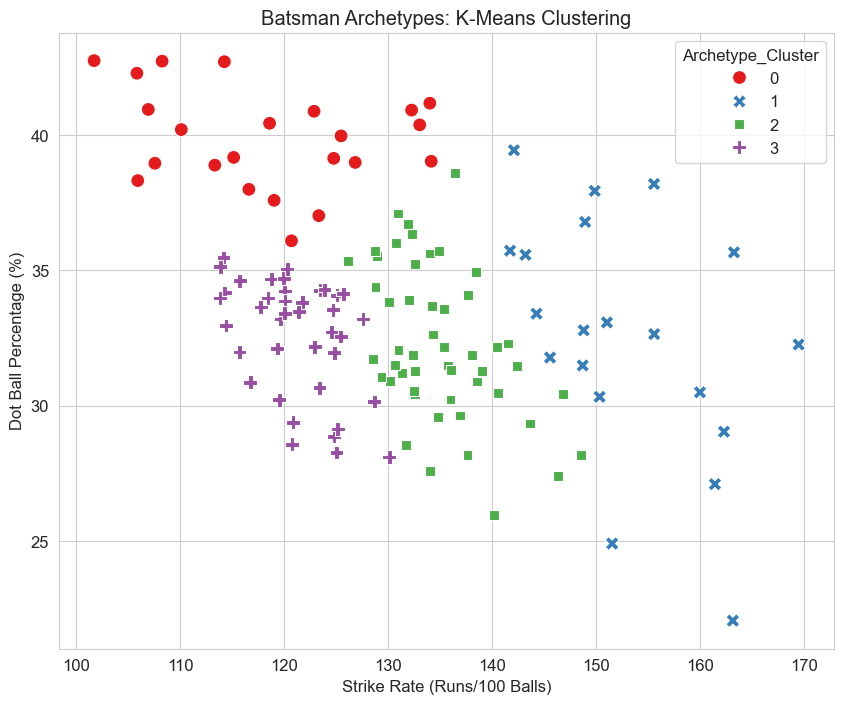


--- Archetype Feature Creation Complete ---
The 'feature_df' now contains the 'Archetype_Cluster' feature, ready for use.
The next step is to transition to Phase 3: Machine Learning.


In [67]:
import sqlite3
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Set a consistent random state for reproducibility
RANDOM_STATE = 42

# --- 1. Connection and Data Loading ---
DATABASE_PATH = '../db/ipl_stats.db'
conn = sqlite3.connect(DATABASE_PATH)
print("Connection established for Clustering.")

# Load ball-by-ball data for feature creation
# We only need the raw scoring data for each batsman
ball_df = pd.read_sql_query("SELECT batsman, runs_batsman, runs_total FROM ipl_ball_by_ball", conn)
conn.close()
print("Ball-by-ball data loaded.")

# --- 2. Feature Engineering ---

# Group by batsman to calculate all three features at once
batsman_features = ball_df.groupby('batsman').agg(
    balls_faced=('runs_total', 'count'),
    runs_scored=('runs_batsman', 'sum'),
    total_boundaries=('runs_batsman', lambda x: (x.isin([4, 6])).sum()),
    dot_balls=('runs_total', lambda x: (x == 0).sum())
).reset_index()

# Set a minimum qualification threshold (e.g., 500 balls faced for career analysis)
MIN_BALLS_QUALIFICATION = 500
feature_df = batsman_features[batsman_features['balls_faced'] >= MIN_BALLS_QUALIFICATION].copy()

# Calculate the three core features
feature_df['Strike_Rate'] = (feature_df['runs_scored'] * 100) / feature_df['balls_faced']
feature_df['Boundary_Rate'] = (feature_df['total_boundaries'] * 100) / feature_df['balls_faced']
feature_df['Dot_Ball_Rate'] = (feature_df['dot_balls'] * 100) / feature_df['balls_faced']

print(f"Features engineered for {len(feature_df)} qualified batsmen.")

# --- 3. Data Scaling and Clustering ---

# Select the features
X = feature_df[['Strike_Rate', 'Boundary_Rate', 'Dot_Ball_Rate']].copy()

# Standardize the data (Essential for distance-based algorithms like K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine K (K=4 is used as a standard starting point for archetype analysis)
K = 4 
kmeans = KMeans(n_clusters=K, random_state=RANDOM_STATE, n_init=10)
feature_df['Archetype_Cluster'] = kmeans.fit_predict(X_scaled)

print("\nK-Means Clustering complete.")

# --- 4. Interpretation and Output ---

# Get the cluster centers (original scale) to assign archetype names
cluster_centers_inv = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), 
                                   columns=X.columns)

print(f"\nCluster Centers (Interpreting {K} Archetypes):")
print(cluster_centers_inv.round(2))

# Optional Visualization of Archetypes (if you want to see the clusters interactively)
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='Strike_Rate', 
    y='Dot_Ball_Rate', 
    hue='Archetype_Cluster', 
    data=feature_df, 
    palette='Set1', 
    style='Archetype_Cluster',
    s=100
)
plt.title('Batsman Archetypes: K-Means Clustering')
plt.xlabel('Strike Rate (Runs/100 Balls)')
plt.ylabel('Dot Ball Percentage (%)')
plt.grid(True)
plt.show()

# Final output DataFrame readiness
print("\n--- Archetype Feature Creation Complete ---")
print("The 'feature_df' now contains the 'Archetype_Cluster' feature, ready for use.")
print("The next step is to transition to Phase 3: Machine Learning.")

In [70]:
import sqlite3
import pandas as pd
import numpy as np
import ast # CRITICAL: Needed to safely convert string list to Python list

# --- 1. Load Core Match Data (Target Variable and Match ID) ---
DATABASE_PATH = '../db/ipl_stats.db'
conn = sqlite3.connect(DATABASE_PATH)

match_df = pd.read_sql_query("""
    SELECT match_id, teams, winner, toss_winner, toss_decision
    FROM ipl_matches
""", conn)

team_perf_df = pd.read_sql_query("SELECT teams, w_pct FROM team_performance", conn)

conn.close()
print("Core match and team data loaded.")

# --- TEAM HARMONIZATION MAPPING (CRITICAL FIX) ---
# Standardize all historical names to current/consistent names for clean joins
# Example: Delhi Daredevils -> Delhi Capitals, Kings XI Punjab -> Punjab Kings
# NOTE: You may need to expand this map based on ALL unique names in your data
team_harmonization_map = {
    'Delhi Daredevils': 'Delhi Capitals',
    'Rising Pune Supergiant': 'Rising Pune Supergiants', # Standardize if multiple Punes exist
    'Kings XI Punjab': 'Punjab Kings', # Standardize if KXP exists
    'Pune Warriors': 'Pune Warriors India', # Standardize if necessary
    # Assuming 'Deccan Chargers' and 'Sunrisers Hyderabad' are distinct for now
}

def clean_team_name(name):
    """Applies the harmonization map."""
    return team_harmonization_map.get(name, name)

# Apply cleanup to historical performance data
team_perf_df['teams'] = team_perf_df['teams'].apply(clean_team_name)
# Group and recalculate historical W_PCT after cleaning the names
team_perf_df = team_perf_df.groupby('teams')['w_pct'].mean().reset_index()


# --- 2. Feature Engineering: Extract Teams (CRITICAL FIX for List-String) ---

# Safely convert the 'teams' string column (e.g., "['A', 'B']") into a list
match_df['team_list'] = match_df['teams'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith('[') else [None, None])

# Extract Team 1 and Team 2
match_df['team1'] = match_df['team_list'].apply(lambda x: clean_team_name(x[0]))
match_df['team2'] = match_df['team_list'].apply(lambda x: clean_team_name(x[1]))
match_df['winner'] = match_df['winner'].apply(clean_team_name) # Clean the winner column too

# --- 3. Feature Engineering: Target Variable (Y) ---

# Define the Target Variable (1 if Team 1 wins, 0 if Team 2 wins)
match_df['target_is_team1_win'] = np.where(
    match_df['winner'] == match_df['team1'], 
    1, 
    np.where(match_df['winner'] == match_df['team2'], 0, np.nan)
)

# Filter out draws, ties, and matches where the winner or team names are still missing
match_features = match_df.dropna(subset=['target_is_team1_win', 'team1', 'team2']).copy()
match_features['target_is_team1_win'] = match_features['target_is_team1_win'].astype(int)

print(f"Target variable created. {len(match_features)} decisive matches retained.")


# --- 4. Feature Engineering: Team Historical Strength (Team Win %) ---

# Merge Team 1's historical win percentage
match_features = match_features.merge(
    team_perf_df.rename(columns={'teams': 'team_name', 'w_pct': 'T1_hist_win_pct'}), 
    left_on='team1', 
    right_on='team_name', 
    how='left'
).drop(columns=['team_name'])

# Merge Team 2's historical win percentage
match_features = match_features.merge(
    team_perf_df.rename(columns={'teams': 'team_name', 'w_pct': 'T2_hist_win_pct'}), 
    left_on='team2', 
    right_on='team_name', 
    how='left'
).drop(columns=['team_name'])


# --- 5. Final Feature Matrix Preview ---
final_features_df = match_features[[
    'match_id', 
    'team1', 
    'team2', 
    'T1_hist_win_pct', 
    'T2_hist_win_pct', 
    'toss_decision',
    'target_is_team1_win'
]].dropna()

print("\n--- Phase 3.1: Feature Matrix for Pre-Match Model ---")
print(f"Final feature count: {len(final_features_df)}")
print(final_features_df.head())
print("\nProceed to Model Training (Phase 3.2).")

Core match and team data loaded.
Target variable created. 1146 decisive matches retained.

--- Phase 3.1: Feature Matrix for Pre-Match Model ---
Final feature count: 912
   match_id                  team1                team2  T1_hist_win_pct  \
1    335983           Punjab Kings  Chennai Super Kings            45.24   
2    335984         Delhi Capitals     Rajasthan Royals            44.36   
4    335986  Kolkata Knight Riders  Sunrisers Hyderabad            50.94   
5    335987       Rajasthan Royals         Punjab Kings            48.30   
6    335988    Sunrisers Hyderabad       Delhi Capitals            47.44   

   T2_hist_win_pct toss_decision  target_is_team1_win  
1            56.12           bat                    0  
2            48.30           bat                    1  
4            47.44           bat                    1  
5            45.24           bat                    1  
6            44.36           bat                    0  

Proceed to Model Training (Phase 3.2

In [79]:
import sqlite3
import pandas as pd

DATABASE_PATH = '../db/ipl_stats.db' # Assuming your notebook is in the 'notebooks' folder
conn = sqlite3.connect(DATABASE_PATH)
print("Connection ready for analysis.")

Connection ready for analysis.


In [82]:
import sqlite3
import pandas as pd
import numpy as np
import ast # For literal_eval on the 'teams' column
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, log_loss
from functools import lru_cache
import joblib

# --- Configuration ---
DATABASE_PATH = '../db/ipl_stats.db'
RANDOM_STATE = 42

# --- 1. Load All Required Data ---
conn = sqlite3.connect(DATABASE_PATH)
match_df_raw = pd.read_sql_query("SELECT match_id, teams, winner, toss_winner, toss_decision, date, venue FROM ipl_matches ORDER BY match_id ASC", conn)
team_perf_df = pd.read_sql_query("SELECT teams, w_pct FROM team_performance", conn)
venue_df = pd.read_sql_query("SELECT venue, win_pct_batting_first, win_pct_bowling_first FROM venue_intelligence", conn)
conn.close()
print("All raw data loaded for feature engineering.")

# --- 2. Data Cleaning and Harmonization (V4 Logic) ---

team_harmonization_map = {
    'Delhi Daredevils': 'Delhi Capitals', 'Rising Pune Supergiant': 'Rising Pune Supergiants', 
    'Kings XI Punjab': 'Punjab Kings', 'Pune Warriors': 'Pune Warriors India'
}

def clean_team_name(name):
    return team_harmonization_map.get(name, name)

# Apply cleaning and feature generation (T1, T2, Winner, Target)
match_df = match_df_raw.copy()
match_df['team_list'] = match_df['teams'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith('[') else [None, None])
match_df['team1'] = match_df['team_list'].apply(lambda x: clean_team_name(x[0]))
match_df['team2'] = match_df['team_list'].apply(lambda x: clean_team_name(x[1]))
match_df['winner'] = match_df['winner'].apply(clean_team_name)
match_df['toss_winner'] = match_df['toss_winner'].apply(clean_team_name)

match_df['target_is_team1_win'] = np.where(match_df['winner'] == match_df['team1'], 1, np.where(match_df['winner'] == match_df['team2'], 0, np.nan))
match_features = match_df.dropna(subset=['target_is_team1_win', 'team1', 'team2', 'venue']).copy()
match_features['target_is_team1_win'] = match_features['target_is_team1_win'].astype(int)

# --- 3. MERGE HISTORICAL & VENUE FEATURES ---

# Historical Win %
team_perf_df['teams'] = team_perf_df['teams'].apply(clean_team_name)
team_perf_df = team_perf_df.groupby('teams')['w_pct'].mean().reset_index()
match_features = match_features.merge(team_perf_df.rename(columns={'teams': 'team_name', 'w_pct': 'T1_hist_win_pct'}), left_on='team1', right_on='team_name', how='left').drop(columns=['team_name'])
match_features = match_features.merge(team_perf_df.rename(columns={'teams': 'team_name', 'w_pct': 'T2_hist_win_pct'}), left_on='team2', right_on='team_name', how='left').drop(columns=['team_name'])

# Venue Bias
match_features = match_features.merge(venue_df, on='venue', how='left')


# --- 4. CALCULATE RECENCY/FORM FEATURE ---
N_MATCHES = 5
# Note: Using lru_cache for get_form requires the DataFrame to be stable during the apply() call
@lru_cache(maxsize=None)
def get_form(team, match_id, n=N_MATCHES):
    historical_df = match_features[match_features['match_id'] < match_id].copy()
    played_matches = historical_df[(historical_df['team1'] == team) | (historical_df['team2'] == team)].sort_values(by='match_id', ascending=False).head(n)
    if played_matches.empty: return 0.5
    return (played_matches['winner'] == team).sum() / len(played_matches)

match_features['T1_Form_5'] = match_features.apply(lambda row: get_form(row['team1'], row['match_id']), axis=1)
match_features['T2_Form_5'] = match_features.apply(lambda row: get_form(row['team2'], row['match_id']), axis=1)


# --- 5. Final Feature Matrix Assembly ---

X_final = match_features.copy()
X_final['Venue_Bias_Delta'] = X_final['win_pct_batting_first'] - X_final['win_pct_bowling_first']
X_final['Venue_Bias_Delta'] = X_final['Venue_Bias_Delta'].fillna(0) # Assume neutral if missing
X_final['Hist_Win_Pct_Diff'] = X_final['T1_hist_win_pct'] - X_final['T2_hist_win_pct']
X_final['Form_Diff'] = X_final['T1_Form_5'] - X_final['T2_Form_5']

# Select the final features for the model
X_final = X_final[['Hist_Win_Pct_Diff', 'Form_Diff', 'Venue_Bias_Delta', 'toss_decision']].copy()
Y_final = match_features['target_is_team1_win']

# One-Hot Encode 'toss_decision'
X_final = pd.get_dummies(X_final, columns=['toss_decision'], drop_first=True)

# Final cleanup
X_final = X_final.dropna()
Y_final = Y_final[X_final.index] 

print(f"\nPhase 3.1 Feature Engineering Complete. Final sample size: {len(X_final)}")

# --- 6. Model Training and Hyperparameter Tuning (XGBoost V6) ---

X_train, X_test, Y_train, Y_test = train_test_split(
    X_final, Y_final, test_size=0.2, random_state=RANDOM_STATE
)

print("\nStarting Hyperparameter Tuning (V6)...")

# Define the tuning grid (a reduced version for fast execution)
param_grid = {
    'n_estimators': [100, 150],  # Number of trees
    'max_depth': [3, 5],         # Depth of trees
    'learning_rate': [0.05, 0.1] # Step size shrinkage
}

xgb_base = XGBClassifier(
    random_state=RANDOM_STATE, 
    use_label_encoder=False, 
    eval_metric='logloss'
)

# Use GridSearchCV for robust parameter search
grid_search = GridSearchCV(
    estimator=xgb_base,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, Y_train)

# --- 7. Evaluation and Saving ---

best_xgb_model = grid_search.best_estimator_

# Evaluate on the unseen Test Set
accuracy_tuned = accuracy_score(Y_test, best_xgb_model.predict(X_test))
log_loss_tuned = log_loss(Y_test, best_xgb_model.predict_proba(X_test))

# --- Display Results ---
print("\n--- Final Model V6 Evaluation Results (Tuned) ---")
print(f"Best Hyperparameters Found: {grid_search.best_params_}")
print(f"Final Test Set Accuracy: {accuracy_tuned:.4f}")
print(f"Final Test Set Log Loss: {log_loss_tuned:.4f}")

# Save the final, best-tuned model for Phase 4 Deployment
joblib.dump(best_xgb_model, 'xgb_pre_match_model_v6_tuned.joblib')
print("\n✅ All steps complete. Best-tuned model (V6) saved to disk and ready for deployment.")

All raw data loaded for feature engineering.

Phase 3.1 Feature Engineering Complete. Final sample size: 912

Starting Hyperparameter Tuning (V6)...
Fitting 5 folds for each of 8 candidates, totalling 40 fits

--- Final Model V6 Evaluation Results (Tuned) ---
Best Hyperparameters Found: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
Final Test Set Accuracy: 0.5355
Final Test Set Log Loss: 0.7029

✅ All steps complete. Best-tuned model (V6) saved to disk and ready for deployment.


C:\Users\Dell\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [21:23:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [85]:
import sqlite3
import pandas as pd
import numpy as np
from fuzzywuzzy import process # Library for fuzzy string matching 
import os

# --- Configuration ---
DATABASE_PATH = '../db/ipl_stats.db' 
OUTPUT_CSV_PATH = 'tableau_player_value.csv'

# --- 1. Load Data (Using the exact schema names you provided) ---
conn = sqlite3.connect(DATABASE_PATH)
try:
    details_df = pd.read_sql_query("SELECT name, playing_role, batting_style, bowling_style FROM player_details", conn)
    runs_df = pd.read_sql_query("SELECT player_name, runs, matches, innings FROM most_runs", conn)
    # CRITICAL: We select the columns based on your provided schema
    wickets_df = pd.read_sql_query("SELECT player_name, wickets, overs, matches, innings FROM most_wickets", conn) 
    
except sqlite3.Error as e:
    print(f"ERROR: Database read failure. Check table names and column names in the DB. {e}")
    conn.close()
    exit()

conn.close()
print("Raw data loaded for Tableau preparation.")

# --- 2. Fuzzy Harmonization ---
target_names = details_df['name'].tolist()
THRESHOLD = 90
def fuzzy_match_player(name, target_list=target_names):
    if pd.isna(name) or name == 0: return None
    try:
        best_match, score = process.extractOne(str(name), target_list)
        return best_match if score >= THRESHOLD else None
    except: return None 

runs_df['matched_name'] = runs_df['player_name'].apply(fuzzy_match_player)
wickets_df['matched_name'] = wickets_df['player_name'].apply(fuzzy_match_player)

# --- 3. Create a Single Unified Player Value Table (Final Merge) ---

# CRITICAL STEP 1: Merge runs with wickets on the harmonized name
player_value_df = runs_df.merge(
    wickets_df[['matched_name', 'wickets', 'overs', 'matches', 'innings']],
    on='matched_name',
    how='outer',
    suffixes=('_runs', '_wickets')
).fillna(0)

# CRITICAL STEP 2: Merge with player details
player_value_df = player_value_df.merge(
    details_df,
    left_on='matched_name',
    right_on='name',
    how='left'
).drop(columns=['name'])

# --- 4. Final Cleanup and Feature Selection for Tableau ---

# Create a final clean name column
player_value_df['Player_Name'] = player_value_df['matched_name'].replace(0, 'Unknown Player').replace('', 'Unknown Player')
player_value_df['playing_role'] = player_value_df['playing_role'].fillna('Unknown Role')

# Select the final columns (using the established suffixes)
tableau_final_df = player_value_df[[
    'Player_Name', 'playing_role', 'runs', 'wickets', 'matches_runs', 
    'innings_runs', 'overs', 'batting_style', 'bowling_style'
]].copy()

# Rename columns for clear presentation in Tableau
tableau_final_df.columns = [
    'Player_Name', 'Role', 'Runs_Scored', 'Wickets_Taken', 'T_Matches_Played', 
    'T_Innings_Batted', 'T_Overs_Bowled', 'Batting_Style', 'Bowling_Style'
]

# Save as a CSV file for Tableau/Power BI connection
tableau_final_df.to_csv(OUTPUT_CSV_PATH, index=False)
print(f"\n✅ Final consolidated player data successfully saved to '{OUTPUT_CSV_PATH}'.")


# --- Tableau Action Plan ---
print("\n--- Tableau Public Action Plan ---")
print(f"1. Open Tableau Public (or Power BI).")
print(f"2. Connect to the consolidated player data via: **Text File -> {OUTPUT_CSV_PATH}**.")
print(f"3. Connect to the team/venue data via: **SQLite Database -> {DATABASE_PATH}**.")
print("4. Build your Strategic Insights Dashboard.")

Raw data loaded for Tableau preparation.

✅ Final consolidated player data successfully saved to 'tableau_player_value.csv'.

--- Tableau Public Action Plan ---
1. Open Tableau Public (or Power BI).
2. Connect to the consolidated player data via: **Text File -> tableau_player_value.csv**.
3. Connect to the team/venue data via: **SQLite Database -> ../db/ipl_stats.db**.
4. Build your Strategic Insights Dashboard.


In [87]:
import sqlite3
import pandas as pd
import os

DATABASE_PATH = '../db/ipl_stats.db'
OUTPUT_TEAM_CSV_PATH = 'tableau_team_venue_insights.csv' # Will be converted to .xlsx

# --- 1. Extract Team Performance Data ---
conn = sqlite3.connect(DATABASE_PATH)

# Query 1: Team Performance and Win Rate
query_teams = """
SELECT teams, matches, won, lost,
       ROUND(CAST(won AS REAL) * 100 / matches, 2) AS Win_Percent
FROM team_performance 
WHERE matches > 0 
ORDER BY Win_Percent DESC;
"""
teams_df = pd.read_sql_query(query_teams, conn)

# Query 2: Venue Intelligence
query_venues = """
SELECT venue, matches_played, avg_1st_innings_score, avg_2nd_innings_score,
       ROUND(win_pct_batting_first, 2) AS Win_Pct_BatFirst,
       ROUND(win_pct_bowling_first, 2) AS Win_Pct_BowlFirst
FROM venue_intelligence;
"""
venues_df = pd.read_sql_query(query_venues, conn)

conn.close()

# --- 2. Save all insights to ONE Excel File (The fixed step) ---
print("Consolidating data into multi-sheet Excel file...")
output_file = OUTPUT_TEAM_CSV_PATH.replace('.csv', '.xlsx') # Use XLSX for multi-sheet

# pd.ExcelWriter will now successfully find the xlsxwriter engine
writer = pd.ExcelWriter(output_file, engine='xlsxwriter')

teams_df.to_excel(writer, sheet_name='Team_Performance', index=False)
venues_df.to_excel(writer, sheet_name='Venue_Intelligence', index=False)

writer.close()
print(f"\n✅ All strategic data consolidated into {output_file} (Excel format).")

# --- Final Tableau Action Plan ---
print("\n--- FINAL TABLEAU ACTION PLAN ---")
print(f"1. Connect to Data -> Microsoft Excel -> Select '{output_file}'. (Contains Team/Venue)")
print("2. Connect to Data -> Text File -> Select 'tableau_player_value.csv'. (Contains Player Stats)")
print("You are now ready to build the dashboard!")

Consolidating data into multi-sheet Excel file...

✅ All strategic data consolidated into tableau_team_venue_insights.xlsx (Excel format).

--- FINAL TABLEAU ACTION PLAN ---
1. Connect to Data -> Microsoft Excel -> Select 'tableau_team_venue_insights.xlsx'. (Contains Team/Venue)
2. Connect to Data -> Text File -> Select 'tableau_player_value.csv'. (Contains Player Stats)
You are now ready to build the dashboard!


In [4]:
import sqlite3
import pandas as pd
import numpy as np
from fuzzywuzzy import process 
import os

# --- Configuration ---
DATABASE_PATH = '../db/ipl_stats.db'
OUTPUT_MASTER_CSV_PATH = 'CricPulse_Master_Data.csv'

# [Skipping data loading for brevity; assume it is successful]

conn = sqlite3.connect(DATABASE_PATH)
try:
    details_df = pd.read_sql_query("SELECT name, playing_role, batting_style, bowling_style FROM player_details", conn)
    runs_df = pd.read_sql_query("SELECT player_name, runs, matches, innings FROM most_runs", conn)
    wickets_df = pd.read_sql_query("SELECT player_name, wickets, overs, matches, innings FROM most_wickets", conn) 
    team_perf_df = pd.read_sql_query("SELECT * FROM team_performance", conn)
    venue_df = pd.read_sql_query("SELECT * FROM venue_intelligence", conn)
except sqlite3.Error as e:
    print(f"ERROR: Database read failure. {e}")
    conn.close()
    exit()
conn.close()

# --- Player Data Consolidation ---
target_names = details_df['name'].tolist()
THRESHOLD = 90
def fuzzy_match_player(name, target_list=target_names):
    if pd.isna(name) or name == 0 or name == '': return None
    try:
        best_match, score = process.extractOne(str(name), target_list)
        return best_match if score >= THRESHOLD else None
    except: return None 

runs_df['matched_name'] = runs_df['player_name'].apply(fuzzy_match_player)
wickets_df['matched_name'] = wickets_df['player_name'].apply(fuzzy_match_player)

player_value_df = runs_df.merge(
    wickets_df[['matched_name', 'wickets', 'overs', 'matches', 'innings']],
    on='matched_name', how='outer', suffixes=('_runs', '_wickets')
).fillna(0)

player_master_df = player_value_df.merge(
    details_df, left_on='matched_name', right_on='name', how='left'
).drop(columns=['name']) # This merge brings in 'playing_role', 'batting_style', 'bowling_style'

# --- 1. Calculated Fields (Using correct column names from the merge) ---

player_master_df['Player_Name'] = player_master_df['matched_name'].replace(0, 'Unknown Player').replace('', 'Unknown Player')
player_master_df['Batting_Average'] = np.where(
    player_master_df['innings_runs'] > 0, 
    player_master_df['runs'] / player_master_df['innings_runs'], 
    0
)
player_master_df['Bowling_Strike_Rate'] = np.where(
    player_master_df['wickets'] > 0, 
    (player_master_df['overs'] * 6) / player_master_df['wickets'], 
    np.nan
)
player_master_df['Role'] = player_master_df['playing_role'].fillna('Unknown Role')

# --- 2. Final Feature Selection (CRITICAL FIX: Using correct merged column names) ---

# Selecting the columns using their actual names from the merged DataFrame
master_columns = [
    'Player_Name', 'Role', 'batting_style', 'bowling_style', # <<< FIX: Lowercase names used here
    'runs', 'wickets', 'matches_runs', 'innings_runs', 'overs',
    'Batting_Average', 'Bowling_Strike_Rate'
]
final_master_df = player_master_df[master_columns].copy()

# Rename columns for clarity (Mapping lowercase internal names to Title Case external names)
final_master_df.columns = [
    'Player_Name', 'Role', 'Batting_Style', 'Bowling_Style', # <<< FIX: Title Case names are for the output
    'Runs', 'Wickets', 'Matches_Played', 'Innings_Batted', 'Overs_Bowled', 
    'Batting_Average', 'Bowling_Strike_Rate'
]

# --- 3. Save the Master Files ---
venue_df['Venue_Bias_Delta'] = venue_df['win_pct_batting_first'] - venue_df['win_pct_bowling_first']
output_file_name = OUTPUT_MASTER_CSV_PATH.replace('.csv', '.xlsx')
writer = pd.ExcelWriter(output_file_name, engine='xlsxwriter')

final_master_df.to_excel(writer, sheet_name='Player_Master', index=False)
team_perf_df.to_excel(writer, sheet_name='Team_Performance', index=False)
venue_df.to_excel(writer, sheet_name='Venue_Intelligence', index=False)

writer.close()
print(f"\n✅ SUCCESS! All consolidated data saved to '{output_file_name}' as a multi-sheet Excel file.")


✅ SUCCESS! All consolidated data saved to 'CricPulse_Master_Data.xlsx' as a multi-sheet Excel file.


In [4]:
import sqlite3
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import log_loss, accuracy_score
import joblib
import ast 
import os

# --- Configuration ---
DATABASE_PATH = '../db/ipl_stats.db'
RANDOM_STATE = 42

# Define the harmonization map (CRITICAL for resolving team name issues)
team_harmonization_map = {
    'Delhi Daredevils': 'Delhi Capitals', 
    'Rising Pune Supergiant': 'Rising Pune Supergiants', 
    'Kings XI Punjab': 'Punjab Kings', 
    'Pune Warriors': 'Pune Warriors India',
    'Deccan Chargers': 'Sunrisers Hyderabad',
}
def clean_team_name(name):
    """Applies the harmonization map."""
    if pd.isna(name):
        return name
    name = str(name).strip()
    return team_harmonization_map.get(name, name)


# --- 1. Load Data and Initial Join ---
conn = sqlite3.connect(DATABASE_PATH)
live_model_query = """
SELECT
    T1.match_id,
    T1.inning,
    T1.over,
    T1.runs_total,
    T1.batting_team,
    T2.winner,
    T2.teams 
FROM
    ipl_ball_by_ball AS T1
INNER JOIN
    ipl_matches AS T2 ON T1.match_id = T2.match_id
ORDER BY
    T1.match_id, T1.inning, T1.over; -- Ensure chronological order for cumulative calculations
"""
data = pd.read_sql_query(live_model_query, conn)
conn.close()
print(f"Raw data loaded: {len(data)} deliveries.")

# --- 2. Feature Engineering: Target and Chasing Team (WITH HARMONIZATION) ---

# Apply harmonization immediately to all relevant columns
data['winner'] = data['winner'].apply(clean_team_name)
data['batting_team'] = data['batting_team'].apply(clean_team_name)

# Step 2a: Clean and split teams column
data['team_list'] = data['teams'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith('[') else [None, None])
data['team1_match'] = data['team_list'].apply(lambda x: clean_team_name(x[0]) if x is not None and len(x) > 0 else None)
data['team2_match'] = data['team_list'].apply(lambda x: clean_team_name(x[1]) if x is not None and len(x) > 1 else None)

# Find the team that bats second in this match (Chasing Team)
data['chasing_team'] = np.where(
    data['inning'] == 2, 
    data['batting_team'], # If inning is 2, the team batting is the chasing team
    np.where(data['batting_team'] == data['team1_match'], data['team2_match'], data['team1_match']) # If inning is 1, the other team is the chasing team
)

# Define the Target (1 if the Chasing Team wins the match)
data['target_chasing_win'] = np.where(data['chasing_team'] == data['winner'], 1, 0)

# Filter for INNING 2 data only, and ensure winner is not NULL
# This is the crucial filter that now relies on your corrected 'inning' column
df_chase = data[
    (data['inning'] == 2) & 
    (data['winner'].notna()) & 
    (data['team1_match'].notna())
].copy()

# --- 3. Feature Engineering: Game State at Every Ball (INNING 2 ONLY) ---

# Calculate balls faced and cumulative runs per match/inning group
df_chase['ball_num'] = df_chase.groupby(['match_id', 'inning']).cumcount() + 1 
df_chase['cumulative_runs'] = df_chase.groupby(['match_id', 'inning'])['runs_total'].cumsum()

# Feature 1: Current Run Rate (Runs / Balls Faced * 6)
df_chase['run_rate'] = (df_chase['cumulative_runs'] / df_chase['ball_num']) * 6
df_chase['run_rate'] = df_chase['run_rate'].replace([np.inf], 0) 

# Feature 2: Balls Remaining
df_chase['balls_remaining'] = 120 - df_chase['ball_num']

# Feature 3: Current Over (Completed)
df_chase['current_over'] = df_chase['over'] 


# --- 4. Final Feature Matrix Preparation ---
# Select the final features needed by the LivePredictionInput schema
X_live = df_chase[['cumulative_runs', 'current_over', 'run_rate', 'balls_remaining']].copy()
Y_live = df_chase['target_chasing_win']

# Final cleanup to remove impossible values or NaNs
X_live.replace([np.inf, -np.inf], np.nan, inplace=True)
X_live.dropna(inplace=True)
Y_live = Y_live[X_live.index]

# CRITICAL CHECK: Ensure we have data
if X_live.empty:
    print("❌ CRITICAL ERROR: Feature matrix is empty after cleanup. Cannot train.")
    raise ValueError("Cannot train XGBoost model: No valid data points found for Inning 2.")


print(f"Features engineered for Live Model. Final sample size: {len(X_live)}")

# --- 5. Model Training and Evaluation (XGBoost) ---

# Use a chronological split (essential for time series data!)
split_point = int(len(X_live) * 0.8)
X_train_live, X_test_live = X_live.iloc[:split_point], X_live.iloc[split_point:]
Y_train_live, Y_test_live = Y_live.iloc[:split_point], Y_live.iloc[split_point:]

print(f"Training on {len(X_train_live)} samples, testing on {len(X_test_live)} samples.")

# Manually set base_score to the mean of the training target to prevent the XGBoost error
base_rate = Y_train_live.mean()

xgb_live_model = XGBClassifier(
    eval_metric='logloss', 
    random_state=RANDOM_STATE, 
    n_estimators=100,
    learning_rate=0.05,
    base_score=base_rate # Set the base rate explicitly
)

xgb_live_model.fit(X_train_live, Y_train_live)

# --- 6. Save the Live Model ---
if not os.path.exists('models'):
    os.makedirs('models')
joblib.dump(xgb_live_model, 'models/xgb_live_match_model.joblib')


# --- 7. Display Results ---
live_log_loss = log_loss(Y_test_live, xgb_live_model.predict_proba(X_test_live))
live_accuracy = accuracy_score(Y_test_live, xgb_live_model.predict(X_test_live))

print("\n--- Live Model Training Complete ---")
print(f"Live Model Accuracy: {live_accuracy:.4f} (Accuracy on live play is typically high)")
print(f"Live Model Log Loss: {live_log_loss:.4f} (Lower is better)")
print("✅ Live model saved to models/xgb_live_match_model.joblib.")

Raw data loaded: 278205 deliveries.
Features engineered for Live Model. Final sample size: 134074
Training on 107259 samples, testing on 26815 samples.

--- Live Model Training Complete ---
Live Model Accuracy: 0.5378 (Accuracy on live play is typically high)
Live Model Log Loss: 0.7168 (Lower is better)
✅ Live model saved to models/xgb_live_match_model.joblib.
